# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Ray | Pan | Ray Pan | 4 | 25% |
| Member 2: | Vikesh | Patel | Vikesh Patel | 4 | 25% |
| Member 3: | Chunsheng | Xiao | Chunsheng Xiao | 4 | 25% |
| Member 4: | Socretes | Saha | Socretes Saha | 4 | 25% |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

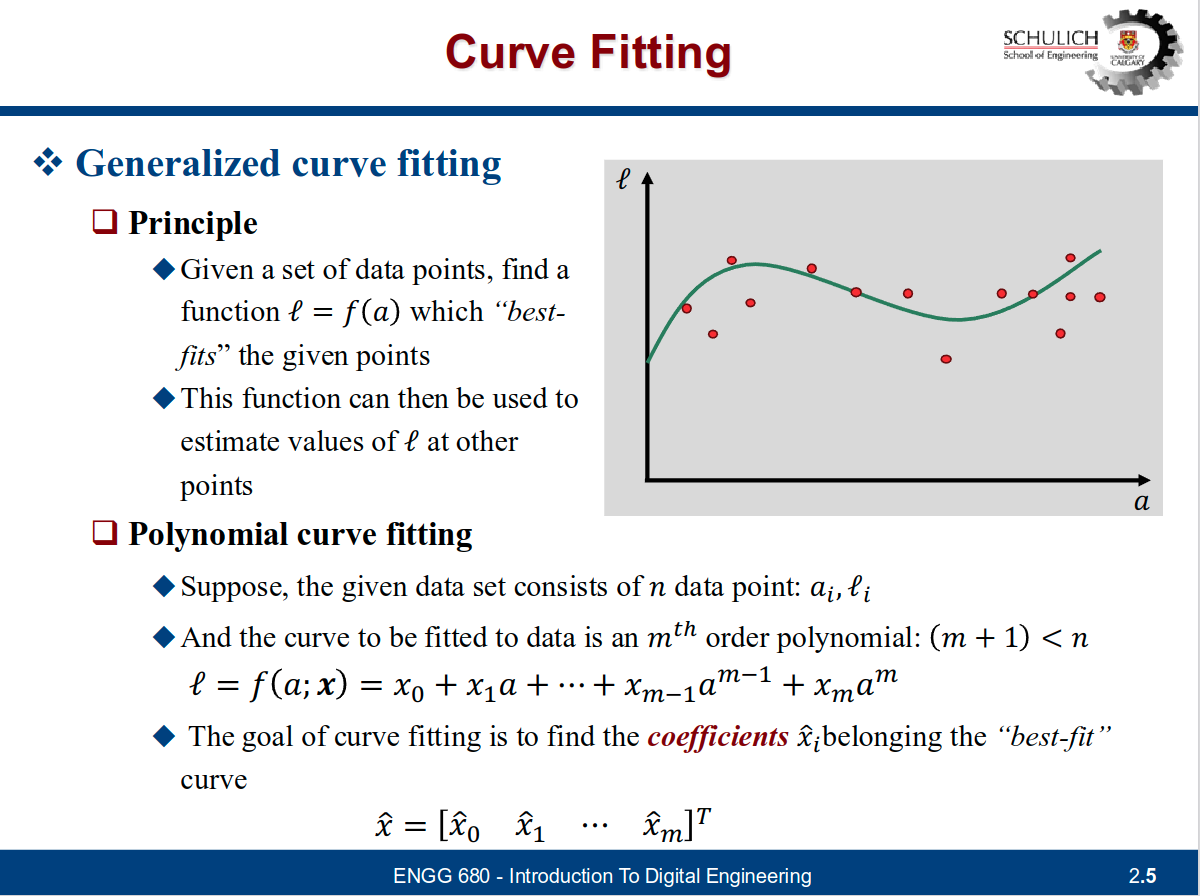

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [ ]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

In [ ]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)

###Mount google drive and read data.xlsx
drive.mount('/content/drive')
df_data = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/data.xlsx')

###convert to numpy array
arr_data = df_data.to_numpy()

###print data
print(df_data.head(),"\n------------\n",arr_data)

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = arr_data[:,0] #noisy observations (first column)
l_var = arr_data[:,1] #variance (second column)
l_true = arr_data[:,2] #true observations(third column)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
           l  l_var     l_true
0 -16.194889     36 -17.000000
1 -15.936144    144 -17.289598
2 -38.690594    169 -17.579150
3 -15.768291    169 -17.868611
4 -19.354669      4 -18.157933 
------------
 [[-16.19488895  36.         -17.        ]
 [-15.93614373 144.         -17.28959808]
 [-38.69059397 169.         -17.57915025]
 ...
 [-22.99118629  25.         -16.42084975]
 [ -8.01284044  64.         -16.71040192]
 [-16.63632193   4.         -17.        ]]


In [ ]:
# step 3
# define the number of observation n
# (1 mark)
n = df_data.shape[0]

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.identity(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n) #-π to π


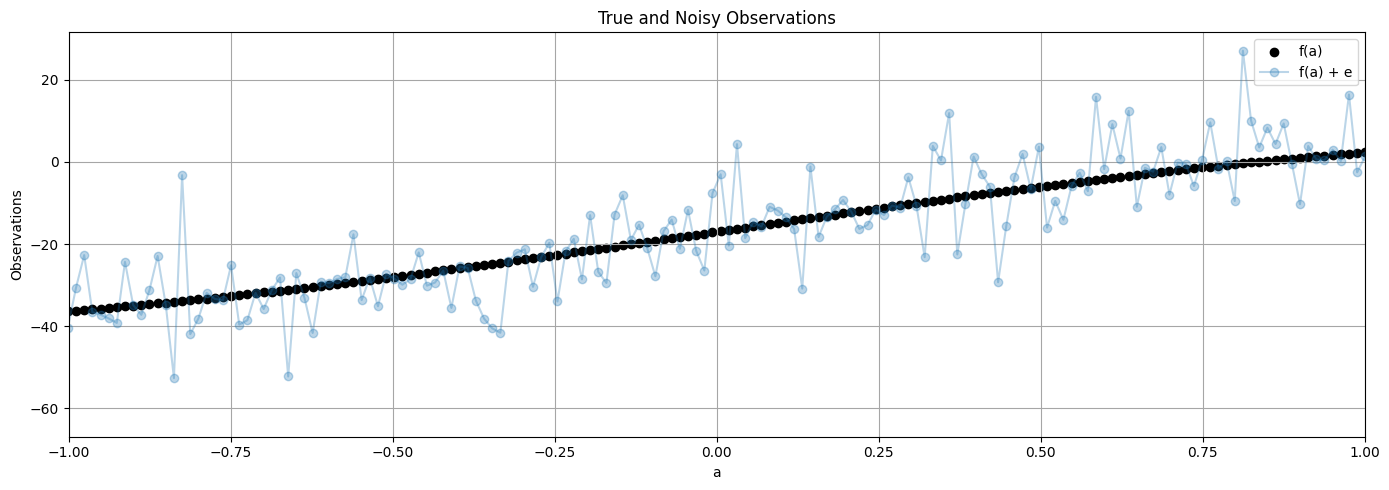

In [ ]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

###Plot the true observations
ax.scatter(a,l_true, color='k',label='f(a)')

###Plot the noisy observations
ax.plot(a,l,color='tab:blue',label="f(a) + e",marker='o',alpha=0.3)

###Set axis labels, title, legend, and x-axis range
ax.set_xlabel('a')
ax.set_ylabel('Observations')
ax.set_title('True and Noisy Observations')
ax.legend()
ax.set_xlim(-1, 1)

###Add grid lines (assignment default)
ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

In [ ]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)
def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
  """
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
  """

###5-1 Construct matrix A for the variable 'deg' (degree) of polynomial
  A = np.vander(a, deg+1, increasing= True)

###5-2 Weight calculation
  AT_P_A = A.T @ P @ A
  AT_P_l = A.T @ P @ l

###5-3 Calculate x (estimated polynomial coefficients)
  AT_P_A_inverse = np.linalg.inv(AT_P_A) #Inverse of 'AT_P_A'
  x =  AT_P_A_inverse @ AT_P_l

###5-4 Calculate v (observation residuals)
  v = l - A @ x

###5-5 Calculate apv (goodness of fit)
  n = len(l)
  apv = (v.T @ P @ v) / (n-(deg+1))

###5-6 Calculate cov_x (uncertainty in estimated coefficients)
  cov_x = apv * AT_P_A_inverse
###print equation
  equation = "f(a) = "
  for i, coef in enumerate(x):
      if i == deg:
        equation += f"{coef:.2f}"
      elif i == deg - 1:
        equation += f"{coef:.2f}a + "
      else:
        equation += f"{coef:.2f}a^{deg - i} + "

  print("Polynomial equation:", equation)
  return (x, cov_x, apv, v)


In [ ]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)

# Call the fit_polynomial_curve function for polynomial degrees of 1
x_deg1, cov_x_deg1, apv_deg1, v_deg1 = fit_polynomial_curve(a, l, P, 1)
print("Residuals:", apv_deg1,"\n---------------------------------------\n")
# Call the fit_polynomial_curve function for polynomial degrees of 3
x_deg3, cov_x_deg3, apv_deg3, v_deg3 = fit_polynomial_curve(a, l, P, 3)
print("Residuals:", apv_deg3,"\n---------------------------------------\n")
# Call the fit_polynomial_curve function for polynomial degrees of 5
x_deg5, cov_x_deg5, apv_deg5, v_deg5 = fit_polynomial_curve(a, l, P, 5)
print("Residuals:", apv_deg5,"\n---------------------------------------\n")

Polynomial equation: f(a) = -16.59a + 7.26
Residuals: 162.742608604322 
---------------------------------------

Polynomial equation: f(a) = -16.72a^3 + 19.64a^2 + 0.04a + -2.08
Residuals: 66.13227783131883 
---------------------------------------

Polynomial equation: f(a) = -16.58a^5 + 22.82a^4 + -0.11a^3 + -3.58a^2 + 0.02a + 0.14
Residuals: 63.758344630184176 
---------------------------------------



In [ ]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

line_uw = np.polyval(np.flip(x_deg1), a)  # For degree 1
cubic_uw = np.polyval(np.flip(x_deg3), a)  # For degree 3
quintic_uw = np.polyval(np.flip(x_deg5), a) # For degree 5

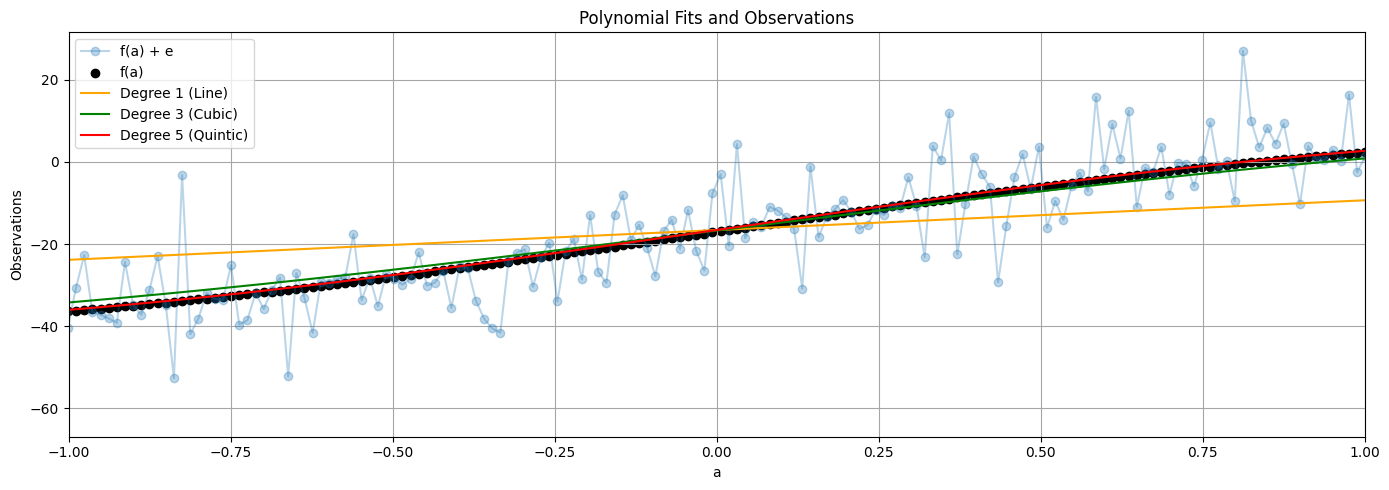

In [ ]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

###Plot the noisy observations
ax.plot(a,l,color='tab:blue',label="f(a) + e",marker='o',alpha=0.3)

###Plot the true observations
ax.scatter(a,l_true, color='k',label='f(a)')

###Plot the polynomials of line
plt.plot(a, line_uw, color='orange', label='Degree 1 (Line)')
###Plot the polynomials of cubic
plt.plot(a, cubic_uw, color='green', label='Degree 3 (Cubic)')
###Plot the polynomials of quintic
plt.plot(a, quintic_uw, color='red', label='Degree 5 (Quintic)')


###Add grid lines (assignment default)
ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()


###Set axis labels, title, legend, and x-axis range
ax.set_xlabel('a')
ax.set_ylabel('Observations')
ax.set_title('Polynomial Fits and Observations')
ax.legend()
ax.set_xlim(-1, 1)

###Add grid lines (assignment default)
ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

In [ ]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
# ...
print(f"A Posteriori Variance Factor for Degree 1 (Linear): {apv_deg1:.4f}")
print(f"A Posteriori Variance Factor for Degree 3 (Cubic): {apv_deg3:.4f}")
print(f"A Posteriori Variance Factor for Degree 5 (Quintic): {apv_deg5:.4f}")

A Posteriori Variance Factor for Degree 1 (Linear): 162.7426
A Posteriori Variance Factor for Degree 3 (Cubic): 66.1323
A Posteriori Variance Factor for Degree 5 (Quintic): 63.7583


In [ ]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
# ...
norm_deg1 = np.linalg.norm(line_uw - l_true)
norm_deg3 = np.linalg.norm(cubic_uw - l_true)
norm_deg5 = np.linalg.norm(quintic_uw - l_true)
# Print results
print(f"Norm between Degree 1 (Linear) Predictions and True Observations: {norm_deg1:.4f}")
print(f"Norm between Degree 3 (Cubic) Predictions and True Observations: {norm_deg3:.4f}")
print(f"Norm between Degree 5 (Quintic) Predictions and True Observations: {norm_deg5:.4f}")

Norm between Degree 1 (Linear) Predictions and True Observations: 229.0602
Norm between Degree 3 (Cubic) Predictions and True Observations: 38.2860
Norm between Degree 5 (Quintic) Predictions and True Observations: 17.3700


In [ ]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
# ...
norm_line = np.linalg.norm(line_uw - l_true)   # Norm for linear
norm_cubic = np.linalg.norm(cubic_uw - l_true) # Norm for cubic
norm_quintic = np.linalg.norm(quintic_uw - l_true) # Norm for quintic
print("A Posteriori Variance Factor (Degree 1):", apv_deg1)
print("A Posteriori Variance Factor (Degree 3):", apv_deg3)
print("A Posteriori Variance Factor (Degree 5):", apv_deg5)

print("Norm between predicted observations (linear) and true observations:", norm_line)
print("Norm between predicted observations (cubic) and true observations:", norm_cubic)
print("Norm between predicted observations (quintic) and true observations:", norm_quintic)

A Posteriori Variance Factor (Degree 1): 162.742608604322
A Posteriori Variance Factor (Degree 3): 66.13227783131883
A Posteriori Variance Factor (Degree 5): 63.758344630184176
Norm between predicted observations (linear) and true observations: 229.06016796744092
Norm between predicted observations (cubic) and true observations: 38.285979929116635
Norm between predicted observations (quintic) and true observations: 17.36996719696425


In [ ]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = np.diag(1 / l_var)

In [ ]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
# ...
# Call for polynomial degree 1
x_deg1, cov_x_deg1, apv_deg1, v_deg1 = fit_polynomial_curve(a, l, P, 1)
print("A Posteriori Variance Factor (Degree 1):", apv_deg1)

# Call for polynomial degree 3
x_deg3, cov_x_deg3, apv_deg3, v_deg3 = fit_polynomial_curve(a, l, P, 3)
print("A Posteriori Variance Factor (Degree 3):", apv_deg3)

# Call for polynomial degree 5
x_deg5, cov_x_deg5, apv_deg5, v_deg5 = fit_polynomial_curve(a, l, P, 5)
print("A Posteriori Variance Factor (Degree 5):", apv_deg5)
# Compute the norm between the predicted observations and true observations
line_uw = np.polyval(np.flip(x_deg1), a)  # For degree 1
cubic_uw = np.polyval(np.flip(x_deg3), a)  # For degree 3
quintic_uw = np.polyval(np.flip(x_deg5), a) # For degree 5

# Calculate norms
norm_line = np.linalg.norm(line_uw - l_true)
norm_cubic = np.linalg.norm(cubic_uw - l_true)
norm_quintic = np.linalg.norm(quintic_uw - l_true)

# Print norms
print("Norm between predicted observations (linear) and true observations:", norm_line)
print("Norm between predicted observations (cubic) and true observations:", norm_cubic)
print("Norm between predicted observations (quintic) and true observations:", norm_quintic)

Polynomial equation: f(a) = -16.54a + 7.68
A Posteriori Variance Factor (Degree 1): 12.054651233436907
Polynomial equation: f(a) = -16.78a^3 + 20.33a^2 + -0.03a + -2.23
A Posteriori Variance Factor (Degree 3): 1.1444647026537131
Polynomial equation: f(a) = -16.80a^5 + 22.68a^4 + -0.07a^3 + -3.50a^2 + 0.01a + 0.12
A Posteriori Variance Factor (Degree 5): 0.944700904385655
Norm between predicted observations (linear) and true observations: 230.67760813832942
Norm between predicted observations (cubic) and true observations: 36.07026687266801
Norm between predicted observations (quintic) and true observations: 5.741606915885327


In [ ]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
# ...
# The A Posteriori Variance Factor (APV) significantly decreases in the weighted LSE,
# indicating a much better fit to the data when the variances of the observations are considered.

# The norms (L2 distance between predicted and true observations) also decrease slightly,
# showing an improvement in the accuracy of the fits with weighted LSE, particularly for higher-degree polynomials.

# Explanation:
# In the unweighted LSE, all observations are treated equally, which can distort the fit,
# especially when there are observations with high variance (less reliable data).

# In the weighted LSE, observations with lower variance (more reliable) are given higher importance,
# leading to a better overall model fit. This results in lower APV values and smaller norms, reflecting
# an improvement in model accuracy by reducing the influence of noisy data.

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

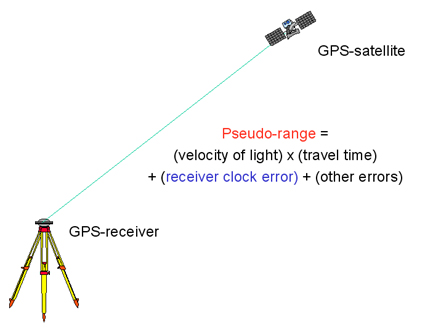

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [ ]:
%ls

drive/  sample_data/


In [ ]:
%cd drive/MyDrive/engg680_2024_fall/

/content/drive/MyDrive/engg680_2024_fall


In [ ]:
%ls

'Introduction to Python'/   Lab_Assignment1/   Lab_Assignment2/   README.md


In [ ]:
%cd Lab_Assignment2

/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2


In [ ]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)

# Loading psuedorange measurement and satellite positions files
df_pseudorange = pd.read_excel('pseudoranges.xlsx')
df_sat_pos = pd.read_excel('satellite_position.xlsx')

# Storing in the format of numpy array
pseudorange = df_pseudorange.to_numpy()
sat_pos = df_sat_pos.to_numpy()

In [ ]:
print(df_pseudorange)
print(pseudorange)
print(df_sat_pos)
print(sat_pos)

    Satellite_ID             P
0              7  2.291974e+07
1              8  2.045989e+07
2             11  2.240034e+07
3             15  2.282914e+07
4             17  2.234201e+07
5             18  2.564645e+07
6             19  2.381478e+07
7             24  2.431140e+07
8             26  2.135364e+07
9             27  2.497161e+07
10            28  2.063898e+07
[[7.00000000e+00 2.29197410e+07]
 [8.00000000e+00 2.04598941e+07]
 [1.10000000e+01 2.24003384e+07]
 [1.50000000e+01 2.28291409e+07]
 [1.70000000e+01 2.23420148e+07]
 [1.80000000e+01 2.56464545e+07]
 [1.90000000e+01 2.38147762e+07]
 [2.40000000e+01 2.43113993e+07]
 [2.60000000e+01 2.13536401e+07]
 [2.70000000e+01 2.49716096e+07]
 [2.80000000e+01 2.06389811e+07]]
    Satellite_ID             x             y             z
0              7  5.280792e+06 -2.550146e+07  4.649508e+06
1              8 -2.159656e+06 -2.111602e+07  1.559791e+07
2             11  1.037185e+07 -2.171311e+07  1.055869e+07
3             15 -1.608576e+

In [ ]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)

# Defining the number of measurements n and the number of states m
n = pseudorange.shape[0]
m = 4

In [ ]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)

# Defining the weight matrix P
P = np.eye(n)
print(P)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
# step 4
# set the initial states as zeros:
# (1 mark)

# Setting the initial states as zeros
x_0 = np.zeros(m)
print(x_0)

[0. 0. 0. 0.]


In [ ]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [ ]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)

# Initializing the corrections array as ones, iteration loop counter i as zero and related arrays
delta = np.ones(m)
i = 0
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [ ]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)

def euclidean_norm(receiver_pos, satellite_pos):
  n = satellite_pos.shape[0]
  distance = np.zeros([n])
  rec_pos = receiver_pos[:3]
  for i in range(0, n):
    sate_pos = satellite_pos[i, 1:]
    distance[i] = np.sqrt(np.sum((rec_pos - sate_pos)**2))
  return distance


In [ ]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
  n = s_pos.shape[0]
  A = np.zeros((n, 4))
  for i in range(n):
    A[i, 0] = (r_pos[0] - s_pos[i, 1]) / rho[i]
    A[i, 1] = (r_pos[1] - s_pos[i, 2]) / rho[i]
    A[i, 2] = (r_pos[0] - s_pos[i, 3]) / rho[i]
    A[i, 3] = 1
  return A

In [ ]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)

# defining the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part

i = 0
# x_corr = np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918, 0])
x_corr = x_0

convergence_threshold = 0.001
while True:

  # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
  # (1 marks)
  dist = euclidean_norm(x_corr, sat_pos)

  # compute the design matrix A
  # (1 marks)
  A = design_matrix(x_corr, sat_pos, dist)

  # compute the misclosure array w
  # (1 marks)
  w = dist - pseudorange[:, 1]

  # compute the corrections delta
  # (1 marks)
  delta = -np.linalg.inv(A.transpose() @ P @ A) @ (A.transpose() @ P @ w)

  # update the states
  # (1 marks)
  x_corr = x_corr + delta

  # compute the position error from using the updated states against groundtruth
  # (1 marks)
  err_pos = x_corr[:3] - GroundTruth

  # update the counter i, (i.e., increament of 1 for each iteration)
  # (1 mark)
  i = i + 1

  # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
  # (1 marks)
  arr_w.append(w)
  arr_delta.append(delta)
  arr_err_pos.append(err_pos)
  arr_i.append(i)

  print(i)
  print("delta:")
  print(delta)
  print("w:")
  print(w)
  print("x corrected:")
  print(x_corr)
  print("error pos:")
  print(err_pos)
  print('\n')

  if np.sqrt(np.sum(delta[:3]**2)) <= convergence_threshold or i > 20:
    break

dist = euclidean_norm(x_corr, sat_pos)
v = dist - pseudorange[:, 1]                        # residual

# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = (v.transpose() @ P @ v)/(n-m)

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = apv*np.linalg.inv(A.transpose() @ P @ A)




1
delta:
[-1922855.7836262  -4255895.27713601  5906176.3677754   1229806.28016081]
w:
[3534543.32140303 5881051.00917708 3877416.30446588 3766833.34553794
 4353761.43463428 1101071.29806546 2801964.48121247 2283828.13684117
 4999960.35362056 1968296.47568328 6343828.97100315]
x corrected:
[-1922855.7836262  -4255895.27713601  5906176.3677754   1229806.28016081]
error pos:
[-289366.40394895 -604268.09463238  953694.74822622]


2
delta:
[ 260823.51276662  538551.14792508 -855623.2646533  -224531.58453746]
w:
[ -450967.56939746 -1011250.77107609  -547190.08656275  -611154.96953303
  -628118.83744043  -114202.51204256  -401671.0295042   -306461.6294488
  -840033.70902523  -259739.77698836 -1163916.75476334]
x corrected:
[-1662032.27085958 -3717344.12921092  5050553.10312209  1005274.69562334]
error pos:
[-28542.89118233 -65716.94670729  98071.48357291]


3
delta:
[ 26807.23406957  61494.00072722 -92497.925395   -23538.53856174]
w:
[ -52485.95273621 -107782.67872063  -61995.78113848  -62818

In [ ]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)
print(f"Estimated States:\n {x_corr}")
print(f"Corrections Array:\n {arr_delta}")
print(f"Estimated Measurements Residuals:\n {v}")
print(f"A Posteriori Variance of Unit Weight:\n {apv}")
print(f"Covariance Matrix of Estimated States:\n {C_x_hat}")
print(f"Number of Iterations:\n {i}")
print(f"3-D Position Errors:\n {arr_err_pos}")


Estimated States:
 [-1633492.44471005 -3651629.54369918  4952485.437345     980368.05509157]
Corrections Array:
 [array([-1922855.7836262 , -4255895.27713601,  5906176.3677754 ,
        1229806.28016081]), array([ 260823.51276662,  538551.14792508, -855623.2646533 ,
       -224531.58453746]), array([ 26807.23406957,  61494.00072722, -92497.925395  , -23538.53856174]), array([ 1641.33080707,  3996.98297452, -5280.79759245, -1333.63359383]), array([  86.54957978,  212.05515588, -274.03626937,  -63.05863117]), array([  4.46868074,  10.95111272, -14.13772301,   2.88727247]), array([ 0.23048084,  0.5648308 , -0.72915237,  6.28950166]), array([ 0.01188687,  0.02913074, -0.0376054 ,  6.46497156]), array([ 6.13053843e-04,  1.50239110e-03, -1.93946034e-03,  6.47402127e+00]), array([ 3.16187039e-05,  7.74869290e-05, -1.00031887e-04,  6.47448800e+00])]
Estimated Measurements Residuals:
 [-6.73312817 -6.58673065 -5.37463281 -6.46988373 -6.6734685  -5.05576046
 -6.3837287  -7.98684396 -6.73855263 -

In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)
print("The A-posteriori variance is 66.76m. It's higher than the a-priori variance which is 1m.\n" +
    "This means that our estimation of variance is too optimistic.\n")
print("The covariance matrix shows that the variance on x and y direction are 21.19 m^2 and 25.52 m^2\n" +
      "They are small compared to the variance on z direction and the receiver clock offset which are 122.85 m^2 and 90.07 m^2 respectively.\n" +
      "This means that GPS positioning is better on xy direction than z direction.\n")

The A-posteriori variance is 66.76m. It's higher than the a-priori variance which is 1m.
This means that our estimation of variance is too optimistic.

The covariance matrix shows that the variance on x and y direction are 21.19 m^2 and 25.52 m^2
They are small compared to the variance on z direction and the receiver clock offset which are 122.85 m^2 and 90.07 m^2 respectively.
This means that GPS positioning is better on xy direction than z direction.



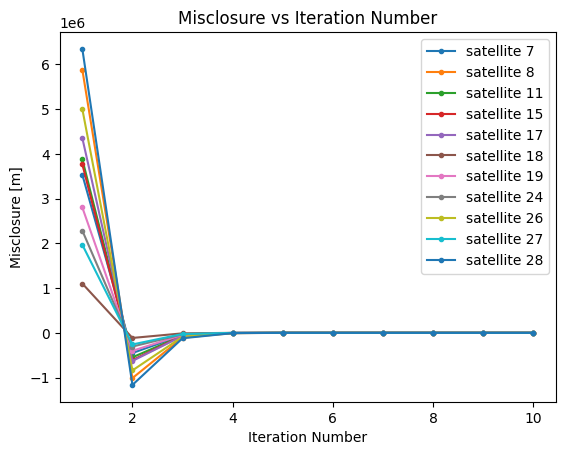

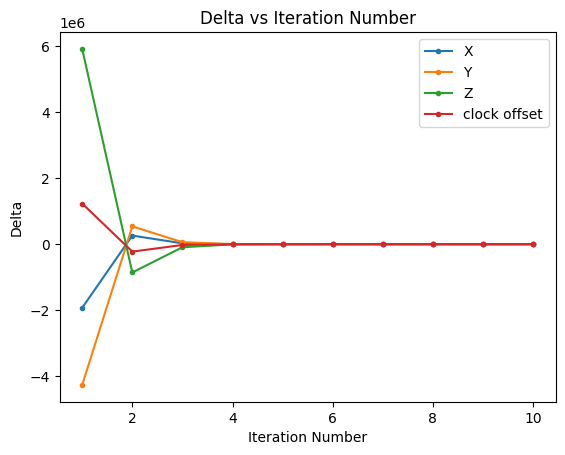

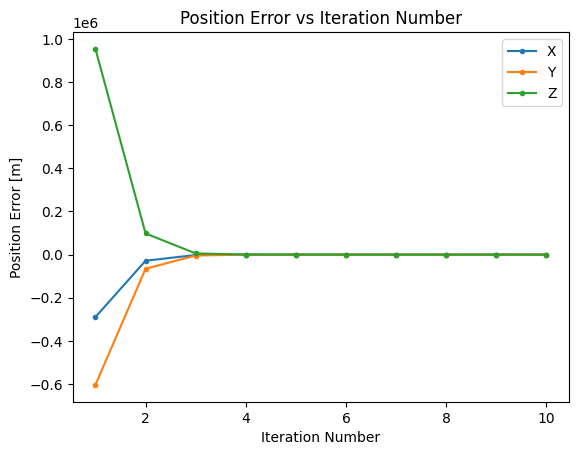

In [ ]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.
import matplotlib.pyplot as plt

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
plt.plot(arr_i, arr_w, '.-')
plt.xlabel('Iteration Number')
plt.ylabel('Misclosure [m]')
plt.title('Misclosure vs Iteration Number')
plt.legend(['satellite 7', 'satellite 8', 'satellite 11', 'satellite 15',
            'satellite 17', 'satellite 18', 'satellite 19',
            'satellite 24', 'satellite 26', 'satellite 27',
            'satellite 28'])
plt.show()

# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)
plt.plot(arr_i, arr_delta, '.-')
plt.xlabel('Iteration Number')
plt.ylabel('Delta')
plt.title('Delta vs Iteration Number')
plt.legend(['X', 'Y', 'Z', 'clock offset'])
plt.show()


# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)
plt.plot(arr_i, arr_err_pos, '.-')
plt.xlabel('Iteration Number')
plt.ylabel('Position Error [m]')
plt.title('Position Error vs Iteration Number')
plt.legend(['X', 'Y', 'Z'])
plt.show()

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)
print("We found two patterns in the figures.\n\n" +
      "The first pattern is that the slope of error and misclosure was steep at first but got smaller after iteration\n"+
      "This is because the difference between our estimation and the true value was large at first, since then the\n"+
      "slope is larger. As the difference gets smaller after iteration, the slope gets smaller.\n\n"+
      "The second pattern is that misclosure and delta's signs were flipped in the second iteration. This is because\n"+
      "the update is largest at the first iteration.\n")

In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
